In [36]:
from google.colab import files

uploaded = files.upload()



Saving 2sem23preços.xlsx to 2sem23preços (3).xlsx


In [37]:
import pandas as pd
import io
PLD_data = pd.read_excel(io.BytesIO(uploaded['2sem23preços.xlsx']), header=None)
# Dataset is now stored in a Pandas Dataframe

print('type(PLD_data) = ', type(PLD_data))
print('len(PLD_data) ', len(PLD_data))



type(PLD_data) =  <class 'pandas.core.frame.DataFrame'>
len(PLD_data)  124


In [38]:
PLD_data.head() 

0
0  91.5
1  91.0
2  95.0
3  96.0
4  97.0

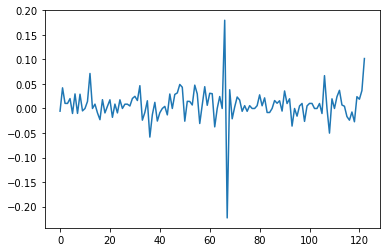

0.007379357420272185
0.03469008352253745


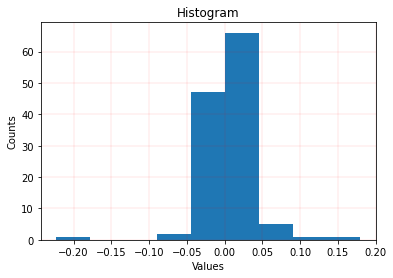

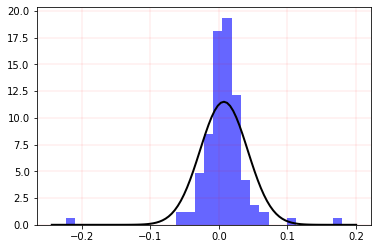

In [48]:
import numpy as np
import matplotlib.pyplot as plt

Precos = PLD_data.to_numpy()

diferenca = np.zeros(123)
retorno = np.zeros(123)
for i in range(123):  #retorno do preço da ação é calculado de forma que o valor é n-1, ou seja 123 dias menos 1
    
    diferenca[i] = Precos[i + 1] - Precos[i]

    retorno[i] = diferenca[i] / Precos[i + 1]
#end for
plt.plot(retorno)
plt.show()

valor_medio = np.mean(retorno)
print(valor_medio)
desvpad = np.std(retorno)
print(desvpad)

# Histogram #

min2 = np.amin(retorno)
max2 = np.amax(retorno) #vai fazer o hitograma dentro desse intervalo

bins2 = np.linspace(min2, max2, 10) #shape do histograma
#hist2 = np.histogram(retorno, bins = bins2) # proprio cálculo do hist.
plt.hist(retorno,bins2)
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.grid(color='r', linestyle='-', linewidth=0.1)
plt.show()
from scipy.stats import norm
# Plot the histogram.
plt.hist(retorno, bins=30, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu = valor_medio
std = desvpad
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
plt.grid(color='r', linestyle='-', linewidth=0.1)
plt.show()

#cálculo do VAR 
from scipy.stats import norm
#

mu = valor_medio
sigma = desvpad # mean and standard deviation

percentil_5 = norm.ppf(0.05, loc=mu, scale=sigma)
percentil_95 = norm.ppf(0.95, loc=mu, scale=sigma)

#print("var_95=",var_95)
#print("var_5=",var_5) 




Novo exercício: posição comprada 

In [41]:
print(valor_medio) #valor médio positivo, o valor está em uma tendência de aumento
print(desvpad)

0.007379357420272185
0.03469008352253745


In [52]:
caixa = 3000000 #quero calcular se eu colocar 3mm na operação comprada e se atende o VaR de 100mil

var_5_reais = percentil_5 * caixa
print(var_5_reais)


-149042.2568430692


Posição Vendida

In [49]:
#vendido no 2sem 15MW a 90R$/MWh, 4380 horas
volume_reais = 15 * 4380 * 250 
#print(volume_reais)

#calculo do VaR95 diario
var_95_vendido = (-1 * percentil_95) * volume_reais #var_5 é o valor que vem da curva normal (calda direita)
print(var_95_vendido) # tem 5% chance de perder 381mil ou mais no próximo dia

-1058418.2474717447
